In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifie
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [45]:
train = pd.read_csv('train_loan.csv')
test = pd.read_csv('test_loan.csv')

In [46]:
train_original = train.copy()
test_original = test.copy()

In [47]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [49]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [50]:
train.shape , test.shape

((614, 13), (367, 12))

In [51]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [52]:
#printing proportion 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# Data Visualisation

<AxesSubplot:>

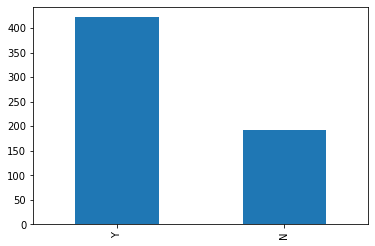

In [53]:
train['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:title={'center':'Credit_History'}>

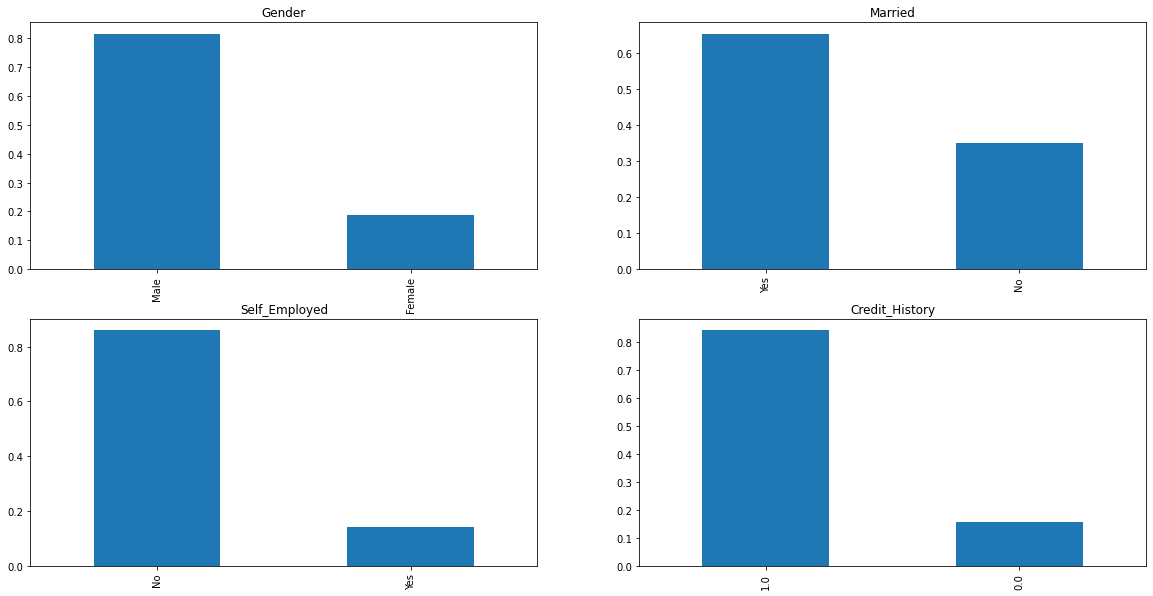

In [54]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

<AxesSubplot:title={'center':'Property_Area'}>

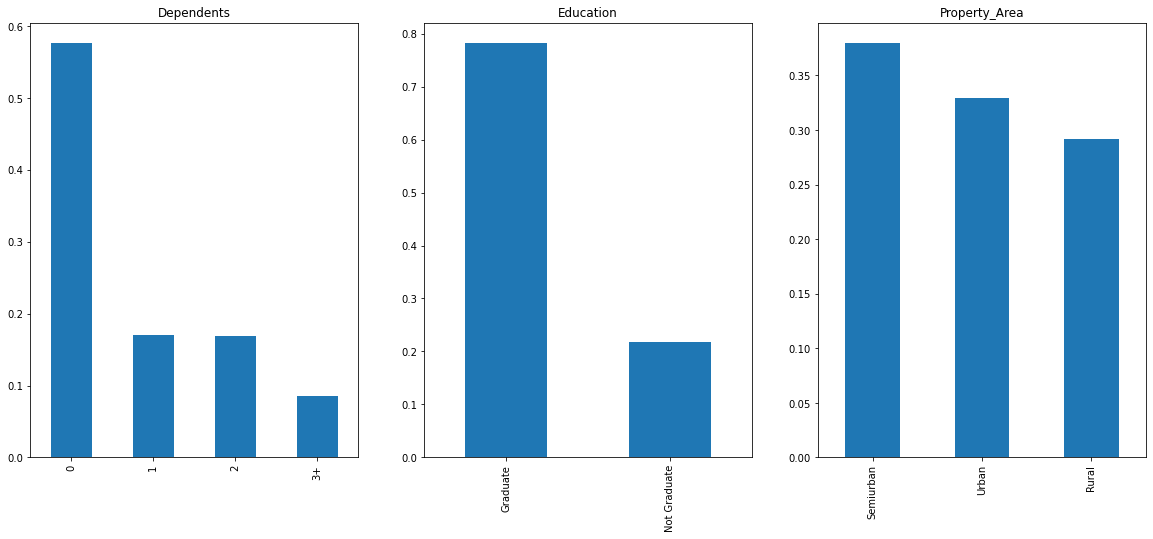

In [55]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,8),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

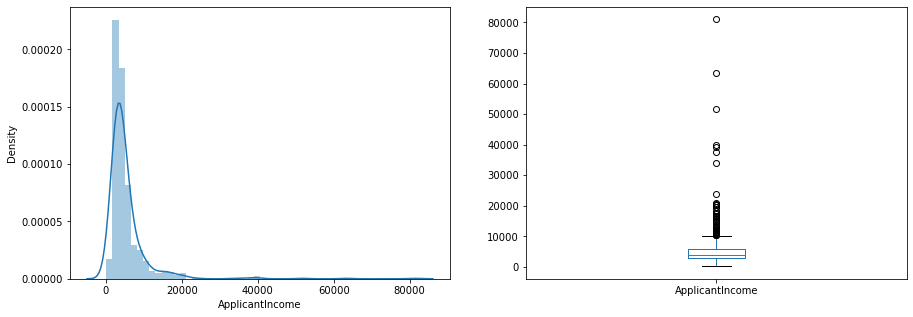

In [56]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(15,5))
plt.show()

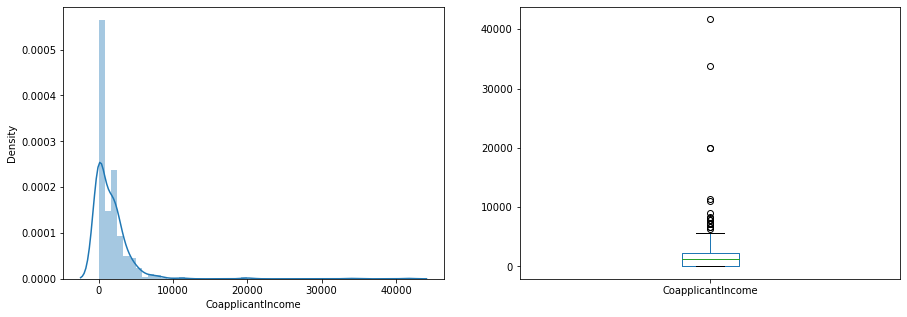

In [57]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(15,5))
plt.show()

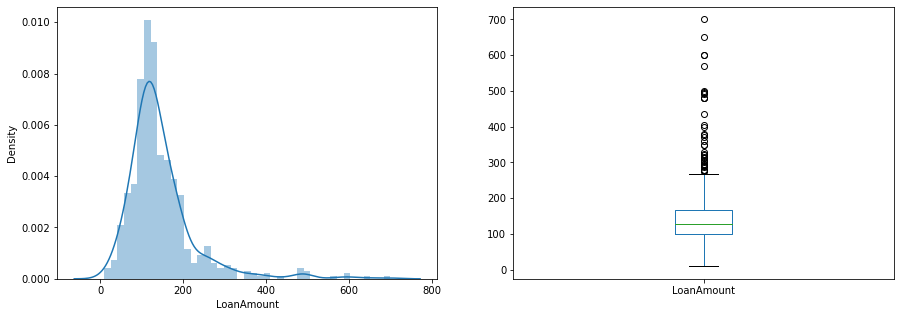

In [58]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(15,5))
plt.show()

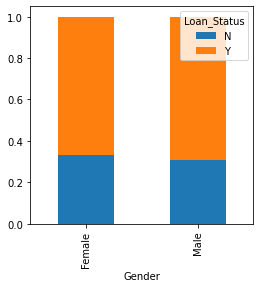

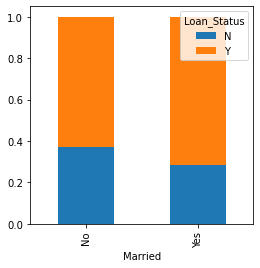

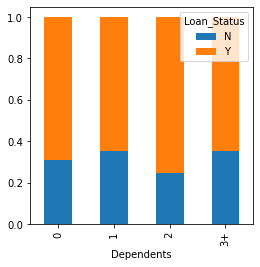

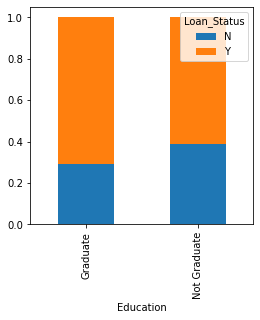

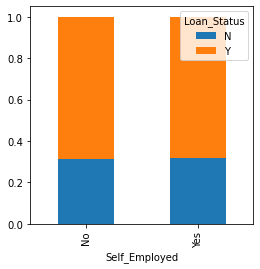

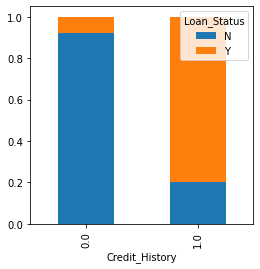

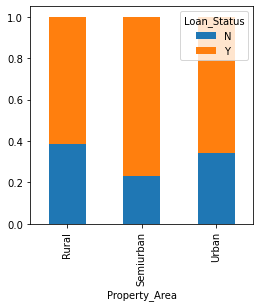

In [59]:
Gender = pd.crosstab(train['Gender'] , train['Loan_Status'])
Married = pd.crosstab(train['Married'] , train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'] , train['Loan_Status'])
Education = pd.crosstab(train['Education'] , train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'] , train['Loan_Status'])
Credit_History = pd.crosstab(train['Credit_History'] , train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'] , train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True , figsize=(4,4))
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True , figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True , figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True , figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True , figsize=(4,4))
plt.show()
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True , figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True , figsize=(4,4))
plt.show()

In [60]:
#replacing values in test and train dataset
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace= True)
train['Loan_Status'].replace('Y',1,inplace= True)

<AxesSubplot:>

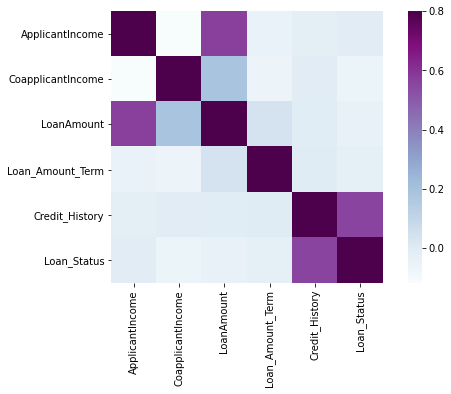

In [61]:
matrix = train.corr()
f,ax = plt.subplots(figsize=(9,5))
sns.heatmap(matrix,vmax=0.8,square= True, cmap="BuPu")

We see that the most correlated variables are (ApplicantsIncome - LoanAmount) and (Credit_History - Loan_Status)

# Data Preprocessing

In [62]:
#Missing Values 
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace= True)
train['Married'].fillna(train['Married'].mode()[0],inplace= True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace= True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace= True)

In [64]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

value of 360 is repeating the most. So we will replace the missing value in this variable using the mode of this variable.

In [66]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace= True)

In [67]:
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace= True)

As it is numerical value, we can use mean or median to impute the missing values. We will use median as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [68]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [70]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace= True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace= True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace= True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace= True)
test['LoanAmount'].fillna(test['LoanAmount'].mode()[0],inplace= True)

In [71]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

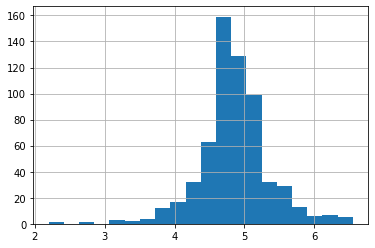

In [72]:
#Outlier Treatment
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(train['LoanAmount'])

In [73]:
#dropping unwanted columns
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [74]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [75]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,1,4.787492,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1


# Feature Engineering
Based on knowledge we can come up with new features that might affect the target variale.
1. Total Income : We will combine the ApplicantIncome and Coapplicant Income. If total income is high the chances of loan approval might be high. 
2. EMI : We calculate the EMI by taking ratio of loan amount with respect to loan amount tern. 
3. Balance Income : This is the income left after the EMI has been paid. 

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

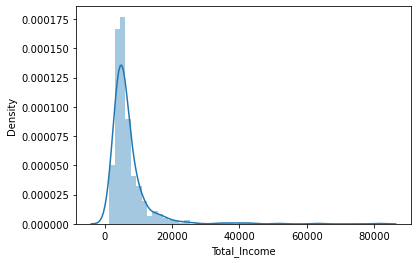

In [76]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']
#checking distribution 
sns.distplot(train['Total_Income'])

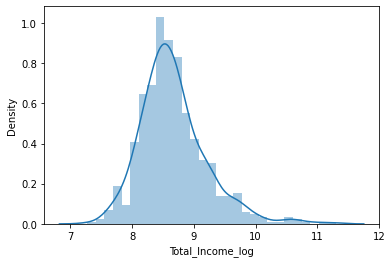

In [77]:
#it is positively skewed, so we take log transformation 
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

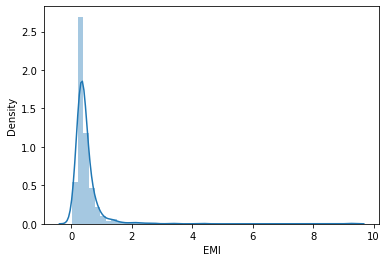

In [78]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])

<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

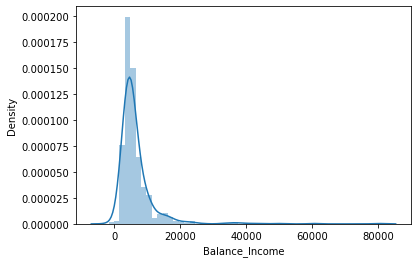

In [79]:
train['Balance_Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance_Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance_Income'])

In [80]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

# Model Builiding

In [81]:
X = train.drop(['Loan_Status'],axis=1)
y= train.Loan_Status

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [99]:
#Logistic Regression Model
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0  61]
 [  0 124]]


0.6702702702702703

In [100]:
#Decision tree model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[32 29]
 [34 90]]


0.6594594594594595

In [101]:
#Random Forest Model 
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 37  24]
 [ 16 108]]


0.7837837837837838

We can see that Random Forest model is best among all. To improve accuracy we will tune hyperparameters. We will use Gridsearch method.

In [86]:
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10, random_state=0),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='accuracy')

In [87]:
grid_search_forest.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=10,
                       n_estimators=10, random_state=0)

In [89]:
#final model 
final_model = RandomForestClassifier(max_depth = 10, max_features =5, n_estimators = 25, criterion = 'entropy', random_state = 0)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.77      0.38      0.51        61
           1       0.75      0.94      0.84       124

    accuracy                           0.76       185
   macro avg       0.76      0.66      0.67       185
weighted avg       0.76      0.76      0.73       185



0.7567567567567568

<AxesSubplot:>

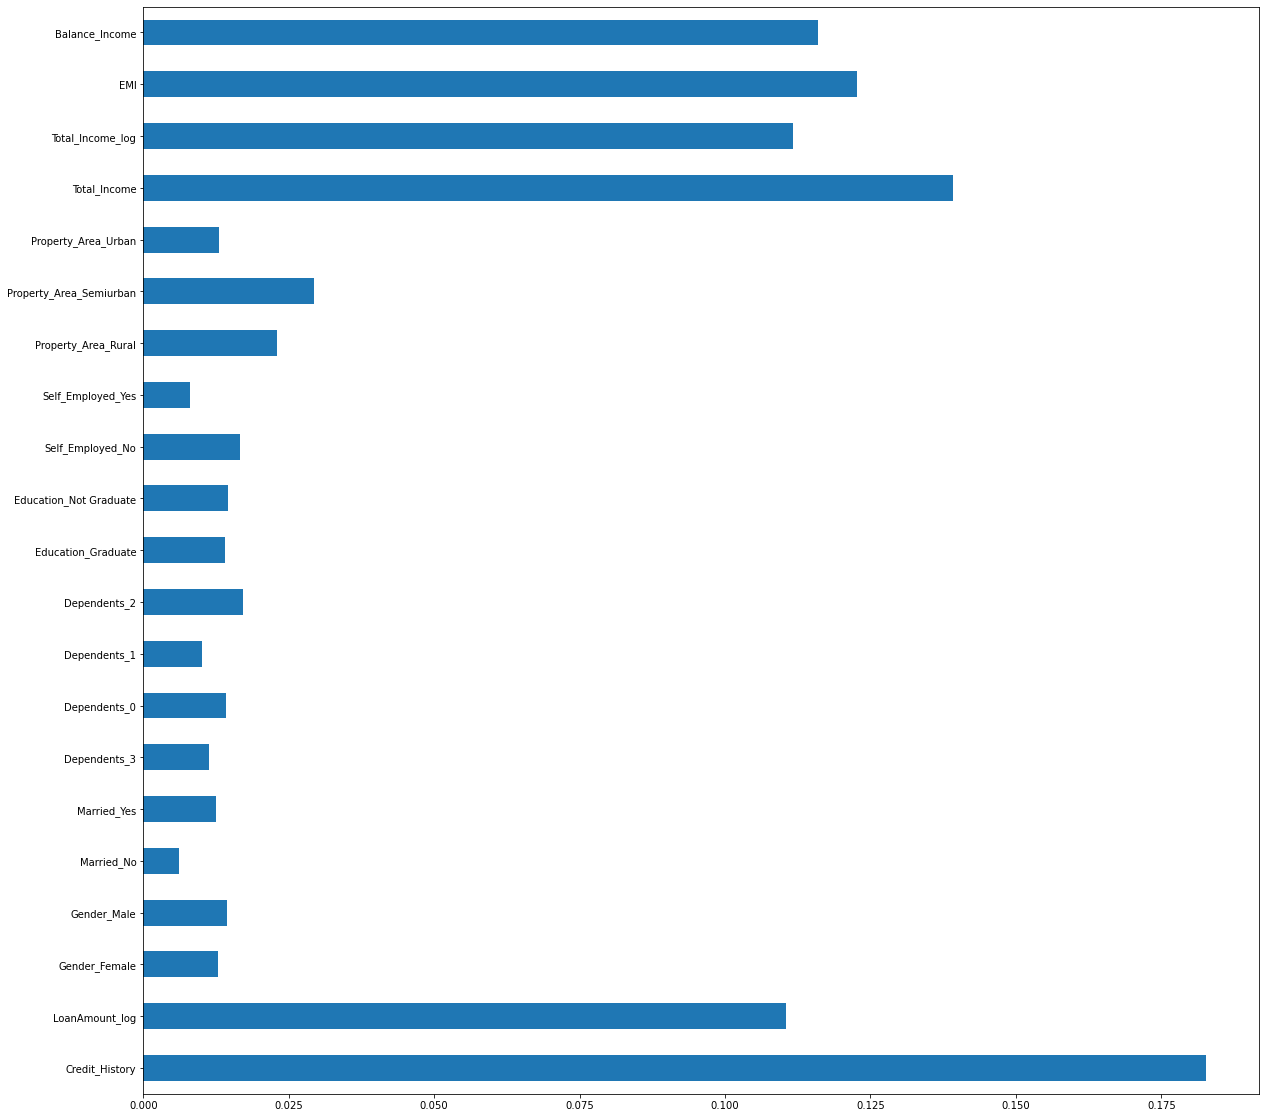

In [90]:
#important features
importance = pd.Series(classifier.feature_importances_,index=X.columns)
importance.plot(kind='barh',figsize=(20,20))

We can see that Credit History is the most important feature followed by Balance Income,Total Income EMI.So, feature engineering helped us in predicting our target vairable.

In [91]:
#prediction on test data 
test_pred = final_model.predict(test)

In [93]:
test_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,